# Gráficos - SAP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as dates
import seaborn as sb
import os
import re
import datetime

%matplotlib inline

In [2]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'build',
 'Caminho.txt',
 'cdp_2018-11-21.pdf',
 'cdp_2018-11-27.pdf',
 'cdp_2018-11-28.pdf',
 'chromedriver.exe',
 'dist',
 'download.png',
 'eliminados',
 'Graficos-SAP.ipynb',
 'hook-pandas.py',
 'Projeto-SAP(v2).ipynb',
 'Projeto-SAP(v2).py',
 'Projeto-SAP.spec',
 'ProjetoSAP',
 'README.md',
 'SAP Basso - Atalho.lnk',
 'SAP_10-4-2019.xlsx',
 'SAP_11-10-2018.xlsx',
 'SAP_12-12-2018.xlsx',
 'SAP_13-2-2019.xlsx',
 'SAP_13-3-2019.xlsx',
 'SAP_13-9-2018.xlsx',
 'SAP_14-11-2018.xlsx',
 'SAP_16-1-2019.xlsx',
 'SAP_17-10-2018.xlsx',
 'SAP_17-4-2019.xlsx',
 'SAP_18-9-2018.xlsx',
 'SAP_19-12-2018.xlsx',
 'SAP_2-1-2019.xlsx',
 'SAP_20-2-2019.xlsx',
 'SAP_20-3-2019.xlsx',
 'SAP_21-11-2018.xlsx',
 'SAP_22-8-2018.xlsx',
 'SAP_23-1-2019.xlsx',
 'SAP_25-9-2018.xlsx',
 'SAP_26-10-2018.xlsx',
 'SAP_26-12-2018.xlsx',
 'SAP_27-2-2019.xlsx',
 'SAP_27-3-2019.xlsx',
 'SAP_28-11-2018.xlsx',
 'SAP_29-8-2018.xlsx',
 'SAP_3-4-2019.xlsx',
 'SAP_30-1-2019.xlsx',
 'SAP_31-10-201

In [3]:
# Selecionando todos os arquivos .xslx para trabalhar

arquivos = []
for arquivo in os.listdir():
    if arquivo[-4:] == 'xlsx':
        arquivos.append(arquivo)
arquivos

['SAP_10-4-2019.xlsx',
 'SAP_11-10-2018.xlsx',
 'SAP_12-12-2018.xlsx',
 'SAP_13-2-2019.xlsx',
 'SAP_13-3-2019.xlsx',
 'SAP_13-9-2018.xlsx',
 'SAP_14-11-2018.xlsx',
 'SAP_16-1-2019.xlsx',
 'SAP_17-10-2018.xlsx',
 'SAP_17-4-2019.xlsx',
 'SAP_18-9-2018.xlsx',
 'SAP_19-12-2018.xlsx',
 'SAP_2-1-2019.xlsx',
 'SAP_20-2-2019.xlsx',
 'SAP_20-3-2019.xlsx',
 'SAP_21-11-2018.xlsx',
 'SAP_22-8-2018.xlsx',
 'SAP_23-1-2019.xlsx',
 'SAP_25-9-2018.xlsx',
 'SAP_26-10-2018.xlsx',
 'SAP_26-12-2018.xlsx',
 'SAP_27-2-2019.xlsx',
 'SAP_27-3-2019.xlsx',
 'SAP_28-11-2018.xlsx',
 'SAP_29-8-2018.xlsx',
 'SAP_3-4-2019.xlsx',
 'SAP_30-1-2019.xlsx',
 'SAP_31-10-2018.xlsx',
 'SAP_5-10-2018.xlsx',
 'SAP_5-12-2018.xlsx',
 'SAP_6-2-2019.xlsx',
 'SAP_6-3-2019.xlsx',
 'SAP_6-9-2018.xlsx',
 'SAP_7-11-2018.xlsx',
 'SAP_9-1-2019.xlsx']

In [4]:
arquivos.sort(key=lambda x: int(re.findall(r'\d+', x)[0])) # ordenando os dias primeiramente
arquivos.sort(key=lambda x: int(re.findall(r'\d+', x)[1])) # ordenando os meses
arquivos.sort(key=lambda x: int(re.findall(r'\d+', x)[2])) # ordenando os anos finalmente
arquivos

['SAP_22-8-2018.xlsx',
 'SAP_29-8-2018.xlsx',
 'SAP_6-9-2018.xlsx',
 'SAP_13-9-2018.xlsx',
 'SAP_18-9-2018.xlsx',
 'SAP_25-9-2018.xlsx',
 'SAP_5-10-2018.xlsx',
 'SAP_11-10-2018.xlsx',
 'SAP_17-10-2018.xlsx',
 'SAP_26-10-2018.xlsx',
 'SAP_31-10-2018.xlsx',
 'SAP_7-11-2018.xlsx',
 'SAP_14-11-2018.xlsx',
 'SAP_21-11-2018.xlsx',
 'SAP_28-11-2018.xlsx',
 'SAP_5-12-2018.xlsx',
 'SAP_12-12-2018.xlsx',
 'SAP_19-12-2018.xlsx',
 'SAP_26-12-2018.xlsx',
 'SAP_2-1-2019.xlsx',
 'SAP_9-1-2019.xlsx',
 'SAP_16-1-2019.xlsx',
 'SAP_23-1-2019.xlsx',
 'SAP_30-1-2019.xlsx',
 'SAP_6-2-2019.xlsx',
 'SAP_13-2-2019.xlsx',
 'SAP_20-2-2019.xlsx',
 'SAP_27-2-2019.xlsx',
 'SAP_6-3-2019.xlsx',
 'SAP_13-3-2019.xlsx',
 'SAP_20-3-2019.xlsx',
 'SAP_27-3-2019.xlsx',
 'SAP_3-4-2019.xlsx',
 'SAP_10-4-2019.xlsx',
 'SAP_17-4-2019.xlsx']

# CPP

In [5]:
cpp_dict = {} # Criando a base de dados começando por um dicionário vazio

In [6]:
nomes = pd.read_excel(arquivos[-1], sheet_name='CPP')['NOME'] # Index será a variável NOME.. pego do último arquivo

In [7]:
nomes.head()

1             CPP I "Dr. Alberto Brocchieri" de Bauru
2    CPP II "Dr. Eduardo de Oliveira Vianna" de Bauru
3        CPP "Professor Ataliba Nogueira" de Campinas
4                              CPP de Franco da Rocha
5                                  CPP de Hortolândia
Name: NOME, dtype: object

In [8]:
cap = pd.read_excel(arquivos[-1], sheet_name='CPP')['CAP']
cap

1     1710
2     1706
3     2058
4     1738
5     1125
6     1640
7      686
8     1079
9     1028
10     152
11    2672
12     691
13    1124
14    1080
15    1080
Name: CAP, dtype: int64

In [9]:
for arquivo in arquivos:
    print(np.datetime64('{}-{:0>2}-{:0>2}'.format(re.findall(r'\d+', arquivo)[2],
                          re.findall(r'\d+', arquivo)[1],
                          re.findall(r'\d+', arquivo)[0])))

2018-08-22
2018-08-29
2018-09-06
2018-09-13
2018-09-18
2018-09-25
2018-10-05
2018-10-11
2018-10-17
2018-10-26
2018-10-31
2018-11-07
2018-11-14
2018-11-21
2018-11-28
2018-12-05
2018-12-12
2018-12-19
2018-12-26
2019-01-02
2019-01-09
2019-01-16
2019-01-23
2019-01-30
2019-02-06
2019-02-13
2019-02-20
2019-02-27
2019-03-06
2019-03-13
2019-03-20
2019-03-27
2019-04-03
2019-04-10
2019-04-17


In [10]:
for arquivo in arquivos: # Aqui serão armazenados os dados de cada arquivo # Meses e dias com configuração para completar os zeros à esquerda
    cpp_dict[np.datetime64('{}-{:0>2}-{:0>2}'.format(re.findall(r'\d+', arquivo)[2], 
                                                     re.findall(r'\d+', arquivo)[1],
                                                     re.findall(r'\d+', arquivo)[0]), dtype='datetime64')] = pd.read_excel(arquivo, sheet_name='CPP')['POP']

In [11]:
cpp = pd.DataFrame(cpp_dict)
cpp.index = nomes

cpp.head()

,2018-08-22 00:00:00,2018-08-29 00:00:00,2018-09-06 00:00:00,2018-09-13 00:00:00,2018-09-18 00:00:00,2018-09-25 00:00:00,2018-10-05 00:00:00,2018-10-11 00:00:00,2018-10-17 00:00:00,2018-10-26 00:00:00,...,2019-02-13 00:00:00,2019-02-20 00:00:00,2019-02-27 00:00:00,2019-03-06 00:00:00,2019-03-13 00:00:00,2019-03-20 00:00:00,2019-03-27 00:00:00,2019-04-03 00:00:00,2019-04-10 00:00:00,2019-04-17 00:00:00
NOME,,,,,,,,,,,,,,,,,,,,,
"CPP I ""Dr. Alberto Brocchieri"" de Bauru",2370,2469,2563,2500,2478,2487,2489,2476,2468,2383,...,2525,2498,2500,2528,2562,2517,2477,2517,2602,2576
"CPP II ""Dr. Eduardo de Oliveira Vianna"" de Bauru",2389,2446,2520,2538,2544,2530,2542,2472,2486,2394,...,2542,2553,2575,2611,2633,2576,2540,2471,2514,2603
"CPP ""Professor Ataliba Nogueira"" de Campinas",2802,2874,2915,2967,2972,2964,2992,2983,2969,2847,...,2444,2420,2409,2314,2267,2303,2295,2299,2273,2289
CPP de Franco da Rocha,2289,2314,2318,2318,2318,2301,2306,2319,2315,2302,...,2311,2315,2303,2289,2317,2317,2315,2280,2217,2206
CPP de Hortolândia,1918,1934,1945,1966,2000,1987,1999,1951,1935,1880,...,2059,2040,2004,1932,1938,1934,1935,1946,1969,1956


In [12]:
cpp.columns

DatetimeIndex(['2018-08-22', '2018-08-29', '2018-09-06', '2018-09-13',
               '2018-09-18', '2018-09-25', '2018-10-05', '2018-10-11',
               '2018-10-17', '2018-10-26', '2018-10-31', '2018-11-07',
               '2018-11-14', '2018-11-21', '2018-11-28', '2018-12-05',
               '2018-12-12', '2018-12-19', '2018-12-26', '2019-01-02',
               '2019-01-09', '2019-01-16', '2019-01-23', '2019-01-30',
               '2019-02-06', '2019-02-13', '2019-02-20', '2019-02-27',
               '2019-03-06', '2019-03-13', '2019-03-20', '2019-03-27',
               '2019-04-03', '2019-04-10', '2019-04-17'],
              dtype='datetime64[ns]', freq=None)

In [13]:
cpp.iloc[0]

2018-08-22    2370
2018-08-29    2469
2018-09-06    2563
2018-09-13    2500
2018-09-18    2478
2018-09-25    2487
2018-10-05    2489
2018-10-11    2476
2018-10-17    2468
2018-10-26    2383
2018-10-31    2445
2018-11-07    2511
2018-11-14    2506
2018-11-21    2494
2018-11-28    2453
2018-12-05    2444
2018-12-12    2492
2018-12-19    2454
2018-12-26    2400
2019-01-02    2419
2019-01-09    2391
2019-01-16    2479
2019-01-23    2481
2019-01-30    2513
2019-02-06    2576
2019-02-13    2525
2019-02-20    2498
2019-02-27    2500
2019-03-06    2528
2019-03-13    2562
2019-03-20    2517
2019-03-27    2477
2019-04-03    2517
2019-04-10    2602
2019-04-17    2576
Name: CPP I "Dr. Alberto Brocchieri" de Bauru, dtype: int64

In [14]:
cap = pd.read_excel(arquivos[0], sheet_name='CPP')['CAP']
cap

1     1710
2     1706
3     2058
4     1738
5     1125
6     1640
7      686
8     1079
9     1028
10     152
11    2672
12     691
13    1124
14    1080
15    1080
Name: CAP, dtype: int64

índice = 0
fig, ax = plt.subplots(5, 3, figsize=(20,30))

for x in range(5):
    for y in range(3):
        ax[x, y].plot(cpp.iloc[índice], 'o-', label='População absoluta') #Inserindo os dados e a forma de representação
        ax[x, y].set_title('{}'.format(cpp.index[índice])) #Inserindo o título dos gráficos
        for label in ax[x, y].xaxis.get_ticklabels():
            label.set_rotation(45) #Inserindo a rotação nos labels dos ticks
        ax[x, y].set_xticks(dates.date2num(cpp.columns)) #Formatando os ticks de acordo com as datas disponíveis
        ax[x, y].xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y'))
        #ax[x, y].hlines(cap.iloc[índice], xmin=ax[x,y].get_xlim()[0], xmax=ax[x,y].get_xlim()[1], color='r', label='Capacidade') # Capacidade do local
        ax[x, y].axhline(y=cap.iloc[índice], xmin=0, xmax=1, color='r', linestyle='--', label='Capacidade Máxima Atual: {}'.format(cap.iloc[índice]))
        #ax[x, y].set_ylim(cpp.values.min(), cpp.values.max()) #Padronizando o eixo y
        ax[x,y].legend()
        índice += 1
        
fig.tight_layout() #ajusta para que cada gráfico não sobreponha o outro
#fig.savefig('cpp_{}-{}-{}.pdf'.format(re.findall(r'\d+', arquivos[-1])[2], re.findall(r'\d+', arquivos[-1])[1], re.findall(r'\d+', arquivos[-1])[0]))

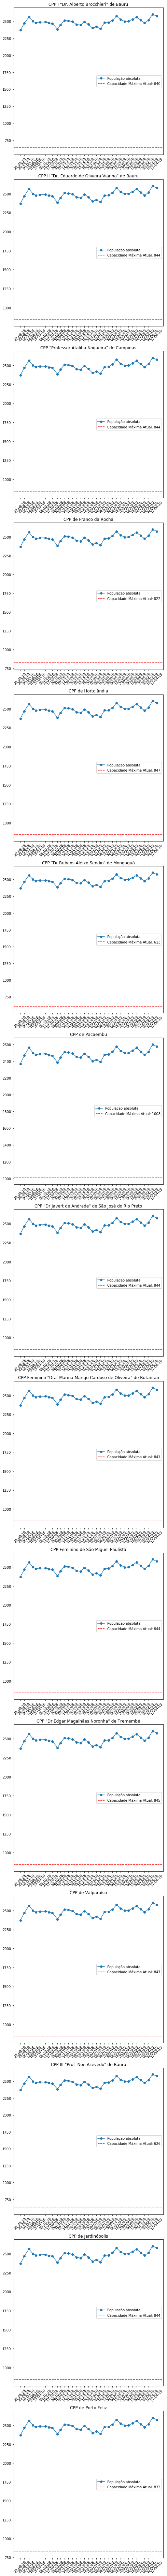

In [60]:
fig, ax = plt.subplots(len(cpp), 1, figsize=(7, (len(cpp)*7)))

for índice in range(len(cpp)):
    ax[índice].plot(cpp.iloc[0], 'o-', label='População absoluta') #Inserindo os dados e a forma de representação
    ax[índice].set_title('{}'.format(cpp.index[índice])) #Inserindo o título dos gráficos
    for label in ax[índice].xaxis.get_ticklabels():
        label.set_rotation(45) #Inserindo a rotação nos labels dos ticks
    ax[índice].set_xticks(dates.date2num(cpp.columns)) #Formatando os ticks de acordo com as datas disponíveis
    ax[índice].xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y'))
    #ax[índice].hlines(cap.iloc[índice], xmin=ax[índice,y].get_xlim()[0], xmax=ax[índice,y].get_xlim()[1], color='r', label='Capacidade') # Capacidade do local
    ax[índice].axhline(y=cap.iloc[índice], xmin=0, xmax=1, color='r', linestyle='--', label='Capacidade Máxima Atual: {}'.format(cap.iloc[índice]))
    #ax[índice].set_ylim(cpp.values.min(), cpp.values.max()) #Padronizando o eixo y
    ax[índice].legend()
        
fig.tight_layout() #ajusta para que cada gráfico não sobreponha o outro
#fig.savefig('cpp_{}-{}-{}.pdf'.format(re.findall(r'\d+', arquivos[-1])[2], re.findall(r'\d+', arquivos[-1])[1], re.findall(r'\d+', arquivos[-1])[0]))

# CDP

In [16]:
cdp_dict = {} # Criando a base de dados começando por um dicionário vazio

In [17]:
nomes = pd.read_excel(arquivos[-1], sheet_name='CDP')['NOME'] # Index será a variável NOME.. pego do último arquivo
len(nomes)

46

In [18]:
nomes.head()

1    CDP "AEVP Renato Gonçalves Rodrigues" de Ameri...
2         CDP "ASP Francisco Carlos Caneschi" de Bauru
3              CDP "Tácio Aparecido Santana"  de Caiuá
4                                      CDP de Campinas
5    CDP "Dr. José Eduardo Mariz de Oliveira" de Ca...
Name: NOME, dtype: object

In [19]:
cap = pd.read_excel(arquivos[-1], sheet_name='CDP')['CAP'] #Capacidade do presídio será a do último arquivo gerado
#app_cap = pd.read_excel(arquivos[-1], sheet_name='CDP')['APP_CAP']#Capacidade da APP será a do último arquivo gerado
cap.tail()

42    847
43    823
44    823
45    823
46    823
Name: CAP, dtype: int64

In [20]:
for arquivo in arquivos:
    print(np.datetime64('{}-{:0>2}-{:0>2}'.format(re.findall(r'\d+', arquivo)[2],
                          re.findall(r'\d+', arquivo)[1],
                          re.findall(r'\d+', arquivo)[0])))

2018-08-22
2018-08-29
2018-09-06
2018-09-13
2018-09-18
2018-09-25
2018-10-05
2018-10-11
2018-10-17
2018-10-26
2018-10-31
2018-11-07
2018-11-14
2018-11-21
2018-11-28
2018-12-05
2018-12-12
2018-12-19
2018-12-26
2019-01-02
2019-01-09
2019-01-16
2019-01-23
2019-01-30
2019-02-06
2019-02-13
2019-02-20
2019-02-27
2019-03-06
2019-03-13
2019-03-20
2019-03-27
2019-04-03
2019-04-10
2019-04-17


In [21]:
# População Geral

for arquivo in arquivos: # Aqui serão armazenados os dados de cada arquivo # Meses e dias com configuração para completar os zeros à esquerda
    cdp_dict[np.datetime64('{}-{:0>2}-{:0>2}'.format(re.findall(r'\d+', arquivo)[2], 
                                                     re.findall(r'\d+', arquivo)[1],
                                                     re.findall(r'\d+', arquivo)[0]), dtype='datetime64')] = pd.read_excel(arquivo, sheet_name='CDP')['POP']

In [22]:
cdp = pd.DataFrame(cdp_dict)
cdp.index = nomes

cdp.tail()

,2018-08-22 00:00:00,2018-08-29 00:00:00,2018-09-06 00:00:00,2018-09-13 00:00:00,2018-09-18 00:00:00,2018-09-25 00:00:00,2018-10-05 00:00:00,2018-10-11 00:00:00,2018-10-17 00:00:00,2018-10-26 00:00:00,...,2019-02-13 00:00:00,2019-02-20 00:00:00,2019-02-27 00:00:00,2019-03-06 00:00:00,2019-03-13 00:00:00,2019-03-20 00:00:00,2019-03-27 00:00:00,2019-04-03 00:00:00,2019-04-10 00:00:00,2019-04-17 00:00:00
NOME,,,,,,,,,,,,,,,,,,,,,
CDP “Marcos Amilton Raysaro” de Icém,1062.0,1035.0,1030.0,1034.0,1026.0,1024.0,1026.0,1018.0,1030.0,1019.0,...,1150.0,1149.0,1164.0,1159.0,1162.0,1156.0,1167.0,1129.0,1145.0,1152
CDP de Limeira,889.0,891.0,921.0,942.0,951.0,992.0,997.0,1012.0,1037.0,1051.0,...,1193.0,1194.0,1261.0,1289.0,1319.0,1347.0,1352.0,1407.0,1412.0,1445
CDP de Nova Independência,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,811.0,807.0,840.0,876.0,876.0,876.0,882.0,874.0,883.0,904
CDP I de Pacaembu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29
CDP II de Pacaembu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28


In [23]:
# População APP

cdp_app_dict = {}
for arquivo in arquivos:
    cdp_app_dict[np.datetime64('{}-{:0>2}-{:0>2}'.format(re.findall(r'\d+', arquivo)[2], 
                                                         re.findall(r'\d+', arquivo)[1],
                                                         re.findall(r'\d+', arquivo)[0]), dtype='datetime64')] = pd.read_excel(arquivo, sheet_name='CDP')['APP_POP']
cdp_app = pd.DataFrame(cdp_app_dict)
cdp_app.head(15)

,2018-08-22 00:00:00,2018-08-29 00:00:00,2018-09-06 00:00:00,2018-09-13 00:00:00,2018-09-18 00:00:00,2018-09-25 00:00:00,2018-10-05 00:00:00,2018-10-11 00:00:00,2018-10-17 00:00:00,2018-10-26 00:00:00,...,2019-02-13 00:00:00,2019-02-20 00:00:00,2019-02-27 00:00:00,2019-03-06 00:00:00,2019-03-13 00:00:00,2019-03-20 00:00:00,2019-03-27 00:00:00,2019-04-03 00:00:00,2019-04-10 00:00:00,2019-04-17 00:00:00
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cdp + cdp_app

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexes\base.py:3772: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


,2018-08-22 00:00:00,2018-08-29 00:00:00,2018-09-06 00:00:00,2018-09-13 00:00:00,2018-09-18 00:00:00,2018-09-25 00:00:00,2018-10-05 00:00:00,2018-10-11 00:00:00,2018-10-17 00:00:00,2018-10-26 00:00:00,...,2019-02-13 00:00:00,2019-02-20 00:00:00,2019-02-27 00:00:00,2019-03-06 00:00:00,2019-03-13 00:00:00,2019-03-20 00:00:00,2019-03-27 00:00:00,2019-04-03 00:00:00,2019-04-10 00:00:00,2019-04-17 00:00:00
"CDP ""AEVP Renato Gonçalves Rodrigues"" de Americana",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"CDP ""ASP Francisco Carlos Caneschi"" de Bauru",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"CDP ""Tácio Aparecido Santana"" de Caiuá",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDP de Campinas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"CDP ""Dr. José Eduardo Mariz de Oliveira"" de Caraguatatuba",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDP de Diadema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDP Feminino de Franco da Rocha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"CDP I ""ASP Giovani Martins Rodrigues"" de Guarulhos",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDP II de Guarulhos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CDP de Hortolândia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
cdp.columns

DatetimeIndex(['2018-08-22', '2018-08-29', '2018-09-06', '2018-09-13',
               '2018-09-18', '2018-09-25', '2018-10-05', '2018-10-11',
               '2018-10-17', '2018-10-26', '2018-10-31', '2018-11-07',
               '2018-11-14', '2018-11-21', '2018-11-28', '2018-12-05',
               '2018-12-12', '2018-12-19', '2018-12-26', '2019-01-02',
               '2019-01-09', '2019-01-16', '2019-01-23', '2019-01-30',
               '2019-02-06', '2019-02-13', '2019-02-20', '2019-02-27',
               '2019-03-06', '2019-03-13', '2019-03-20', '2019-03-27',
               '2019-04-03', '2019-04-10', '2019-04-17'],
              dtype='datetime64[ns]', freq=None)

In [26]:
cdp.iloc[0]

2018-08-22    1117.0
2018-08-29    1131.0
2018-09-06    1120.0
2018-09-13    1156.0
2018-09-18    1168.0
2018-09-25    1183.0
2018-10-05    1207.0
2018-10-11    1228.0
2018-10-17    1226.0
2018-10-26    1236.0
2018-10-31    1243.0
2018-11-07    1247.0
2018-11-14    1262.0
2018-11-21    1257.0
2018-11-28    1258.0
2018-12-05    1242.0
2018-12-12    1242.0
2018-12-19    1270.0
2018-12-26    1255.0
2019-01-02    1306.0
2019-01-09    1316.0
2019-01-16    1325.0
2019-01-23    1314.0
2019-01-30    1314.0
2019-02-06    1307.0
2019-02-13    1353.0
2019-02-20    1322.0
2019-02-27    1353.0
2019-03-06    1394.0
2019-03-13    1353.0
2019-03-20    1334.0
2019-03-27    1292.0
2019-04-03    1126.0
2019-04-10    1023.0
2019-04-17     896.0
Name: CDP "AEVP Renato Gonçalves Rodrigues" de Americana, dtype: float64

índice = 0
fig, ax = plt.subplots(16, 3, figsize=(21,105))

for x in range(15):
    for y in range(3):
        try:
            ax[x, y].plot(cdp.iloc[índice], 'o-', label='População absoluta') #Inserindo os dados e a forma de representação
            ax[x, y].set_title('{}'.format(cdp.index[índice])) #Inserindo o título dos gráficos
            for label in ax[x, y].xaxis.get_ticklabels():
                label.set_rotation(45) #Inserindo a rotação nos labels dos ticks
            ax[x, y].set_xticks(dates.date2num(cdp.columns)) #Formatando os ticks de acordo com as datas disponíveis
            ax[x, y].xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y'))
            #ax[x, y].hlines(cap.iloc[índice], xmin=ax[x, y].get_xlim()[0], xmax=ax[x, y].get_xlim()[1], color='r', label='Capacidade') # Capacidade do local
            ax[x, y].axhline(y=cap.iloc[índice], xmin=0, xmax=1, color='r', linestyle='--', label='Capacidade Máxima Atual: {}'.format(cap.iloc[índice]))
            #ax[x, y].set_ylim(cdp.values.min(), cdp.values.max()) #Padronizando o eixo y
            ax[x, y].legend()
            índice += 1
        except:
            break

fig.tight_layout() #ajusta para que cada gráfico não sobreponha o outro
#fig.savefig('cdp_{}-{}-{}.pdf'.format(re.findall(r'\d+', arquivos[-1])[2], re.findall(r'\d+', arquivos[-1])[1], re.findall(r'\d+', arquivos[-1])[0]))

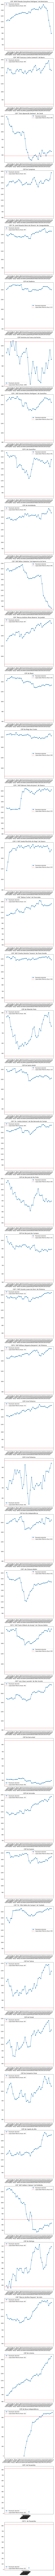

In [61]:
fig, ax = plt.subplots(len(cdp), 1, figsize=(7, (len(cdp)*7)))

for índice in range(len(cdp)):
    ax[índice].plot(cdp.iloc[índice], 'o-', label='População absoluta') #Inserindo os dados e a forma de representação
    ax[índice].set_title('{}'.format(cdp.index[índice])) #Inserindo o título dos gráficos
    for label in ax[índice].xaxis.get_ticklabels():
        label.set_rotation(45) #Inserindo a rotação nos labels dos ticks
    ax[índice].set_xticks(dates.date2num(cdp.columns)) #Formatando os ticks de acordo com as datas disponíveis
    ax[índice].xaxis.set_major_formatter(dates.DateFormatter('%d-%m-%y'))
    #ax[índice].hlines(cap.iloc[índice], xmin=ax[índice].get_xlim()[0], xmax=ax[índice].get_xlim()[1], color='r', label='Capacidade') # Capacidade do local
    ax[índice].axhline(y=cap.iloc[índice], xmin=0, xmax=1, color='r', linestyle='--', label='Capacidade Máxima Atual: {}'.format(cap.iloc[índice]))
    #ax[índice].set_ylim(cdp.values.min(), cdp.values.max()) #Padronizando o eixo y
    ax[índice].legend()

fig.tight_layout() #ajusta para que cada gráfico não sobreponha o outro
#fig.savefig('cdp_{}-{}-{}.pdf'.format(re.findall(r'\d+', arquivos[-1])[2], re.findall(r'\d+', arquivos[-1])[1], re.findall(r'\d+', arquivos[-1])[0]))

# 